# 3B.1. Знакомство с задачей классификации
Классификация — самая популярная задача в машинном обучении. Алгоритм в ней сортирует объекты по нескольким классам. Можно сравнить его с ребенком, который раскладывает игрушки по коробкам — собачек в одну, а кошечек в другую.
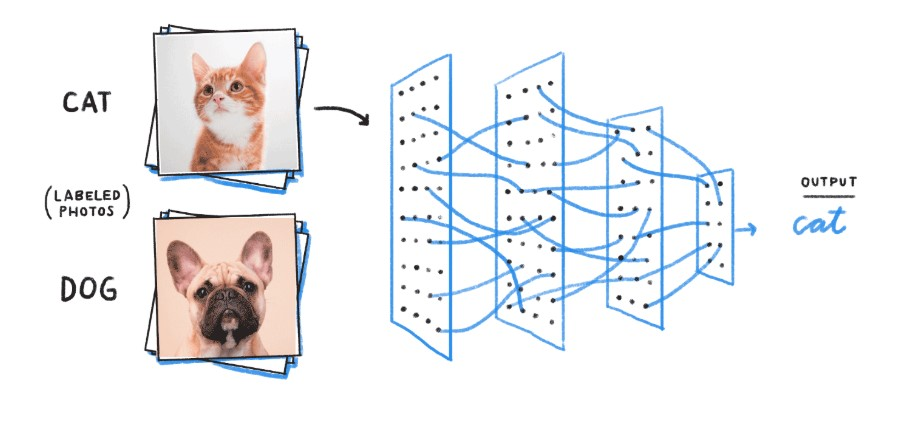
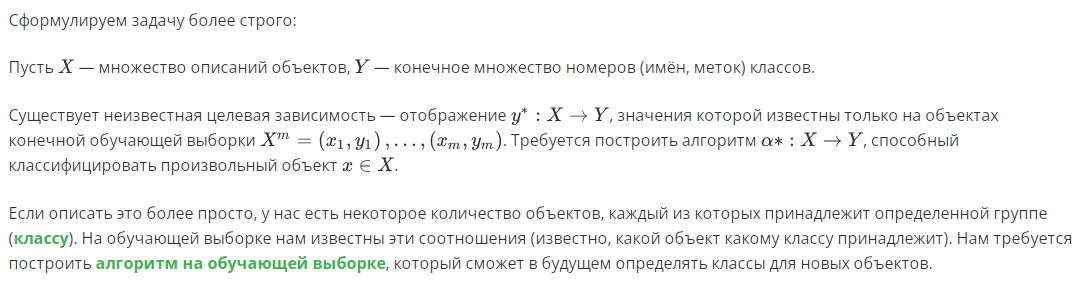
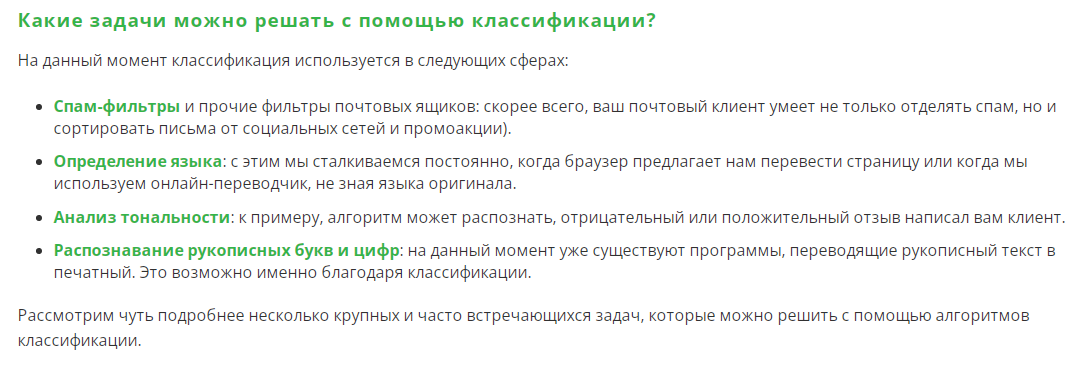
# Задача кредитного скоринга
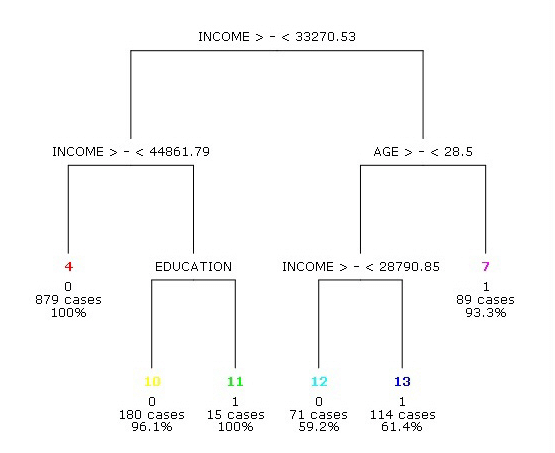
Пример дерева решений для кредитного скоринга. Источник: https://www.researchgate.net/figure/Example-of-decision-tree-for-credit-scoring_fig2_318661593

Пожалуй, самая известная задача, которая решается с помощью алгоритмов классификации. На основе данных предыдущих кредиторов банк решает, выдавать ли кредит клиенту.

В такой задаче у нас всего два класса: надежный заемщик или ненадежный.

Признаки обычно бывают всех типов:
- бинарные (пол, наличие квартиры под залог, семейное положение);
- номинальные (место проживания,профессия);
- ординальные (образование, должность);
- количественные (доход, возраст).

Задача довольно классическая, редко требует долгой предобработки (в силу того, что для кредита нужно обязательно заполнять все поля, пропусков тоже не допускается).

Задача биометрической идентификации личности
Для биометрической идентификации личности используют обычно снимок радужки глаза и/или отпечаток пальца.  Это изображения, поэтому к решению задачи требуется достаточно объемная подготовка данных. Кроме того, тут предельно важна максимально возможная точность.

Задача категоризации текстовых документов
Одна из нетривиальных задач — распределение документов по рубрикам.

Здесь встречаются следующие признаки:
- номинальные (автор, издание, год);
- количественные (встречаемость слов и специфических терминов).

Главная проблема такой задачи в том, что каждый документ может попасть в две рубрики. Кроме того, данные могут иметь большое количество пропусков.

Подводя итог, можно сказать, что классификация используется там, где мы делим объекты на какие-то группы. Количество групп не имеет значения, однако оно должно быть конечным.

Дополнительная литература  
Если вам интересно узнать о решении задач классификации более подробно, предлагаем изучить следующие источники:
- Описание основных методов классификации в крайне доступной форме (подойдет даже тем, у кого нет математического бэкграунда).(https://vas3k.ru/blog/machine_learning/)
- Очень подробное описание метода опорных векторов на Хабре.(https://habr.com/ru/post/105220/)

# 3B.2. Метрики качества классификации
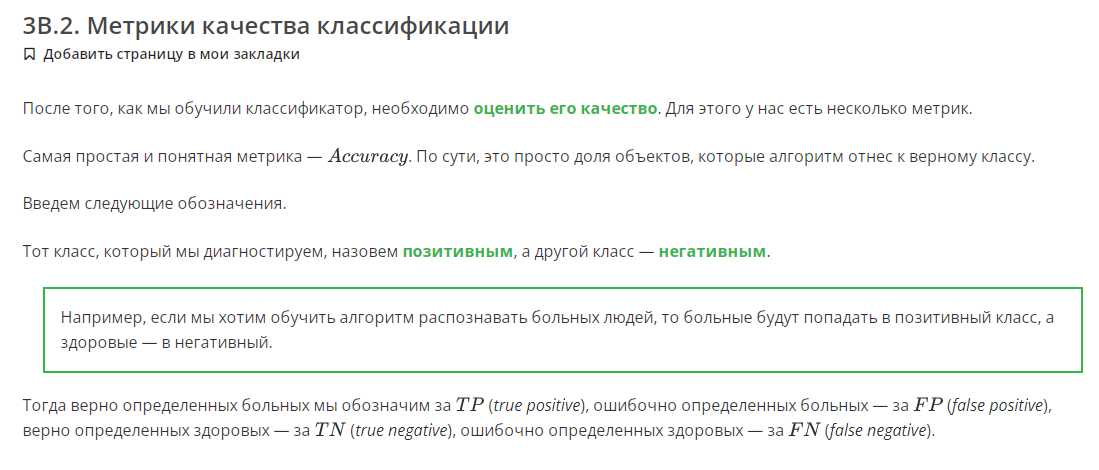
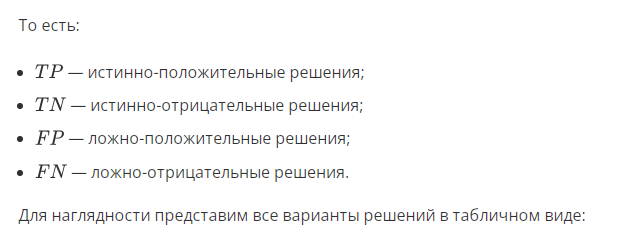
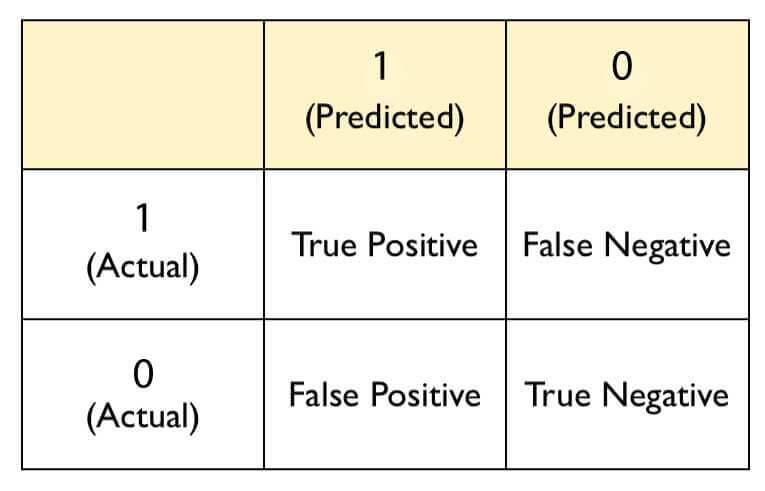
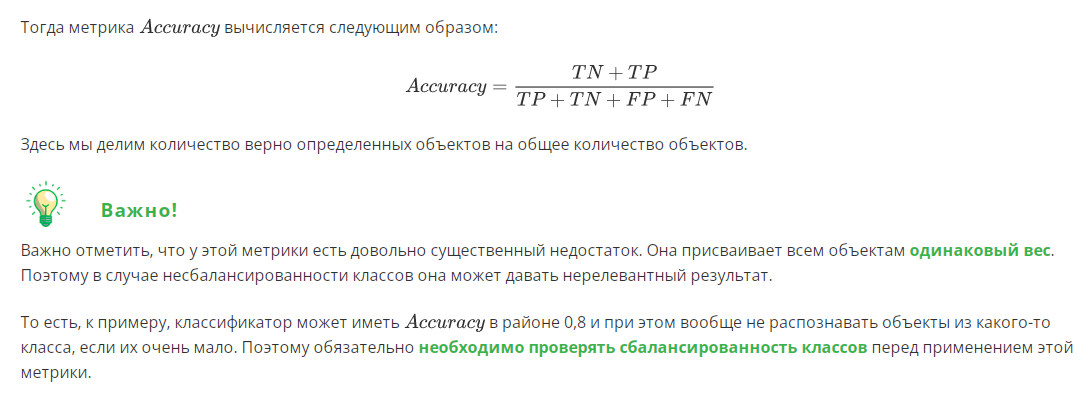
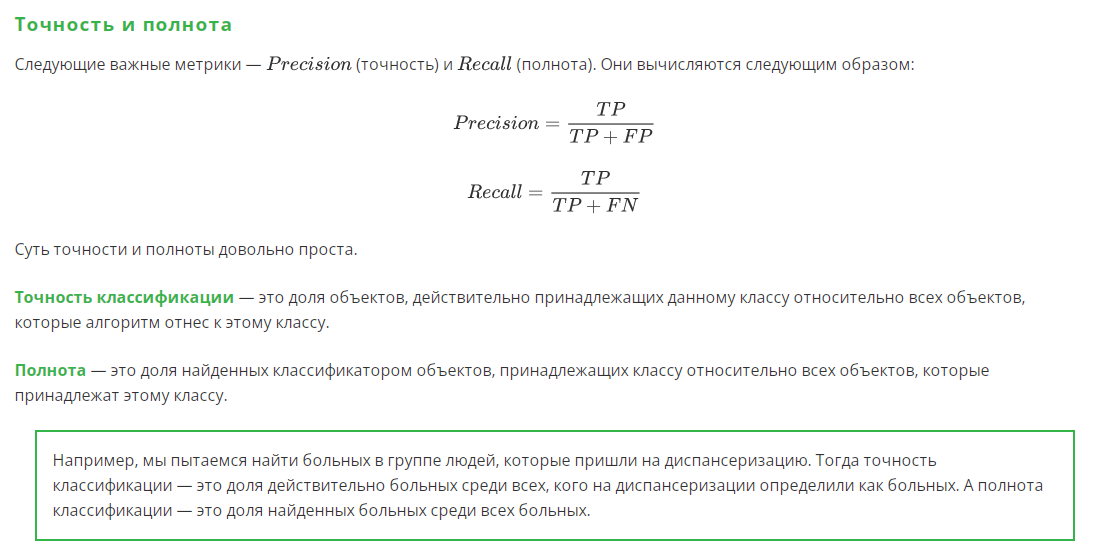
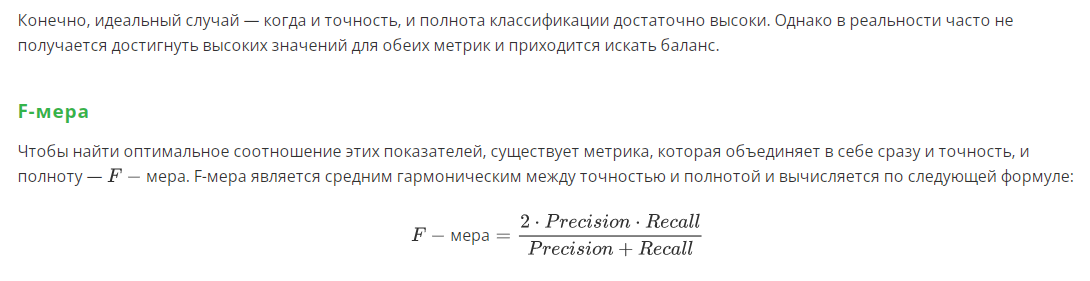

In [4]:
# Реализация в Python
# Теперь попробуем реализовать классификацию и вычислить разобранные метрики.
# Для начала подгружаем библиотеки:
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression # наша модель для классификации

# Воспользуемся встроенным датасетом, который содержит информацию об опухолях груди:
from sklearn.datasets import load_breast_cancer # подгружаем датасет
breast_cancer = load_breast_cancer()

# Теперь зададим зависимую и независимые переменные:
Y = breast_cancer.target ## Наша целевая переменная, 0 — если рака нет, 1 — если есть 
X = breast_cancer.data # X - признаки, по которым мы будем предсказывать рак 

# Разбиваем выборку на обучающую и тестовую и обучаем нашу модель:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3)
model = LogisticRegression()
model.fit(X_train, Y_train)

# Готово! Теперь осталось только вычислить необходимые метрики:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_predicted = model.predict(X_val)
print(accuracy_score(Y_val,Y_predicted))
print(precision_score(Y_val,Y_predicted))
print(recall_score(Y_val,Y_predicted))
print(f1_score(Y_val,Y_predicted))

0.9824561403508771
0.983739837398374
0.9918032786885246
0.9877551020408164


D:\Programs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


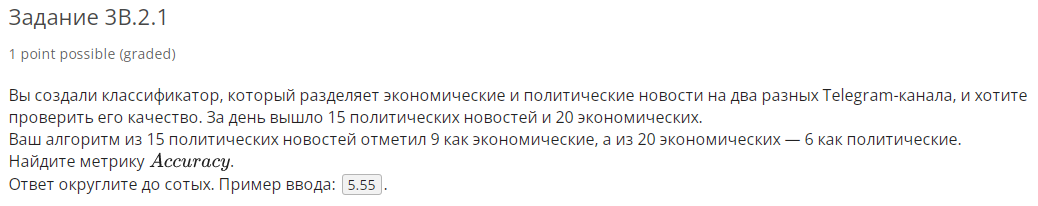

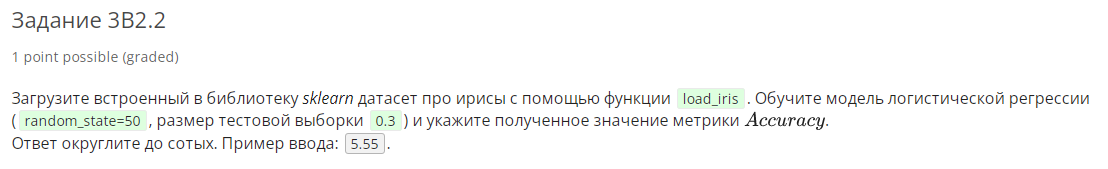

# 3B.3. Классификация. Практика
У вас есть датасет с параметрами мобильных телефонов. Переменная price_range отвечает за то, к какой категории относится телефон: 1 — дорогие, 0 — дешевые.

Скачать данные можно здесь.(https://lms.skillfactory.ru/assets/courseware/v1/bdc99d0cd03de80a4f9167cce6bcd85f/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/train_mobile.csv)

Ваша задача состоит в том, чтобы наиболее точно научиться классифицировать телефоны по этим двум категориям на основании других параметров.

### Шаг 1
Для начала нам надо отобрать признаки, с помощью которых мы будем предсказывать категорию телефона.

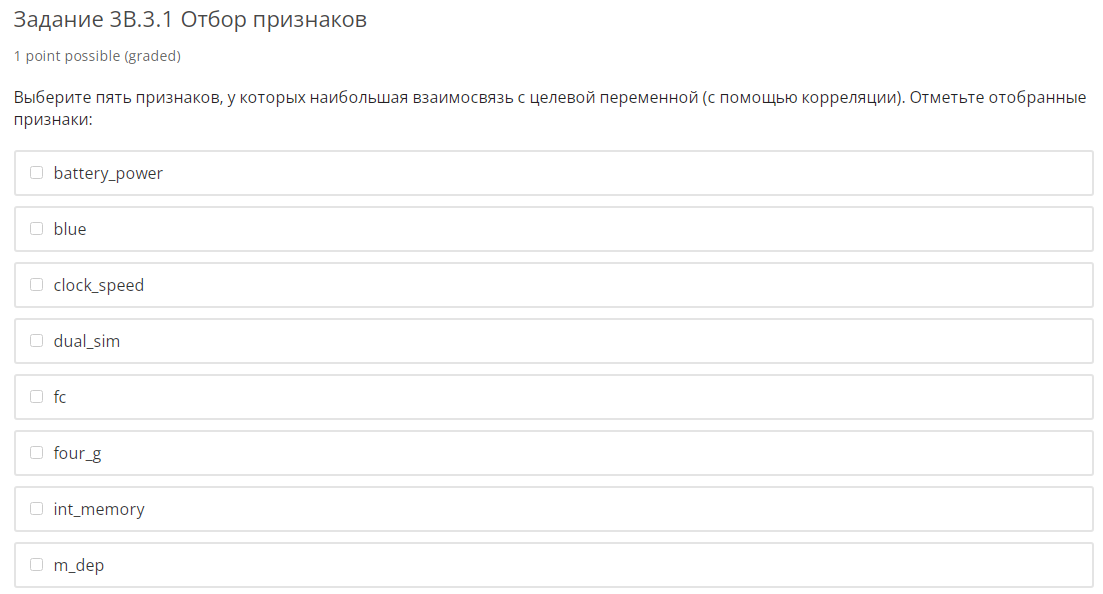
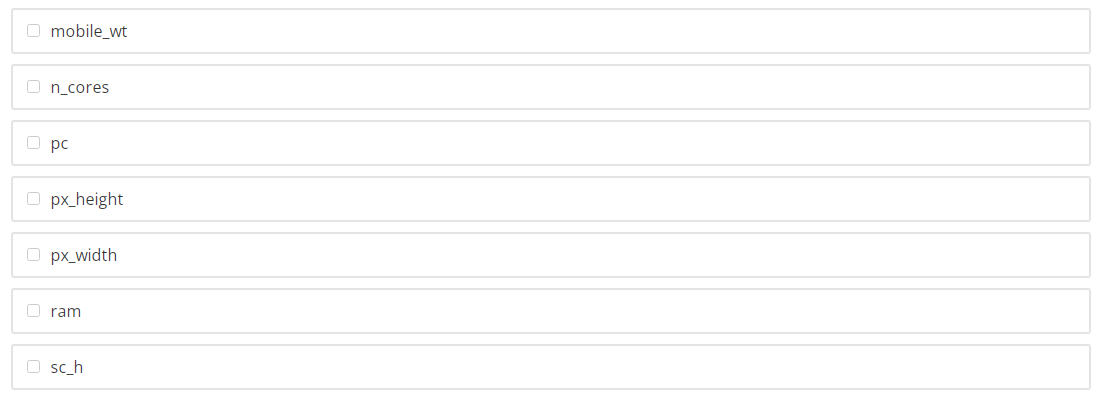
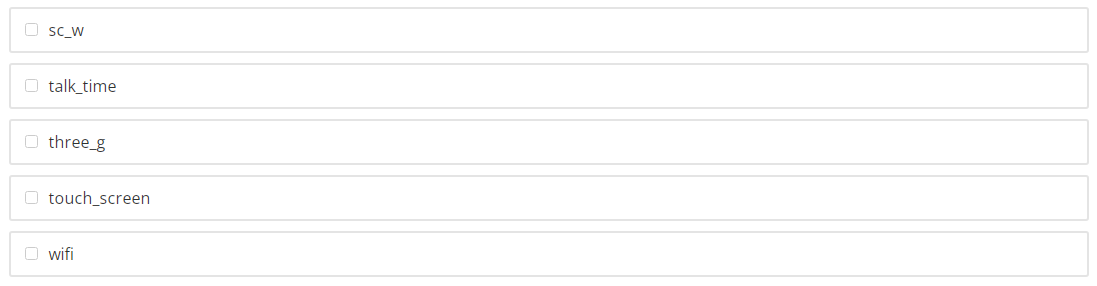

# ШАГ 2
Теперь необходимо обучить алгоритм.  Для начала разбейте выборку на тестовую и обучающую, размер тестовой задайте 0.2. Параметр random_state=31. В качестве модели возьмите логистическую регрессию. В качестве предикторов возьмите пять ранее отобранных признаков.

Рассчитайте метрику, которая покажет, какая доля телефонов, обозначенных классификатором как дорогие, действительно относится к этой категории. 

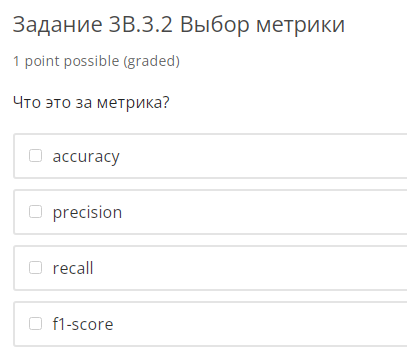

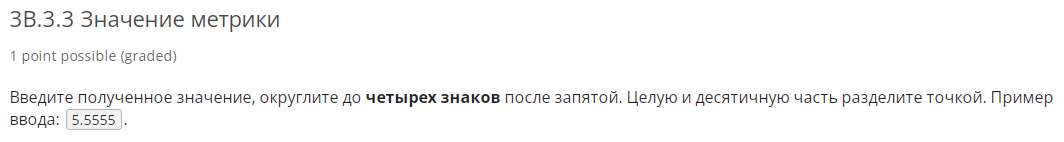

# 3B.4. Логистическая регрессия. Часть 1
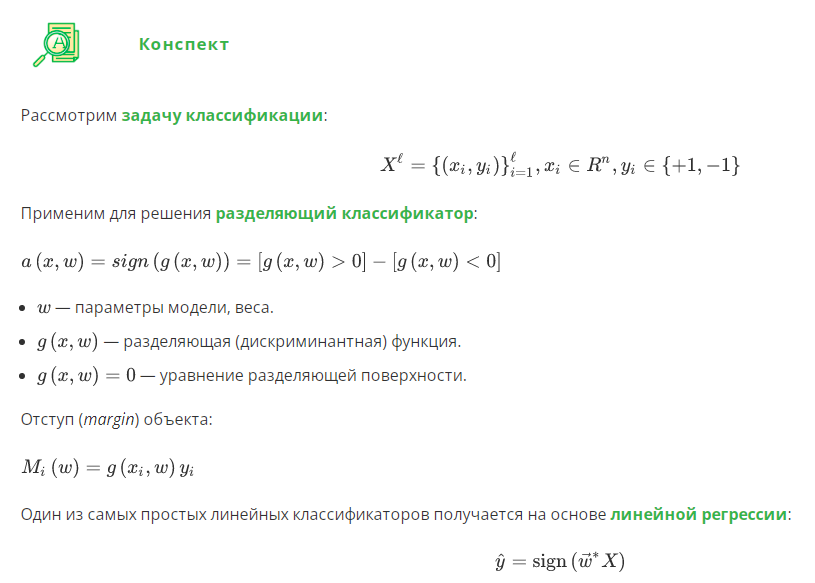
Основная идея линейного классификатора заключается в том, что признаковое пространство может быть разделено гиперплоскостью на два полупространства, в каждом из которых прогнозируется одно из двух значений целевого класса. Если это можно сделать без ошибок, то обучающая выборка называется линейно разделимой.

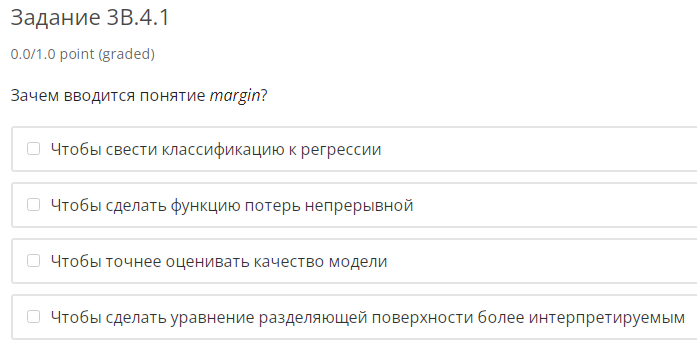

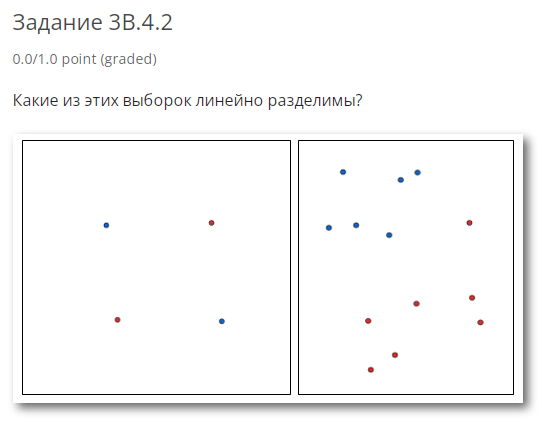
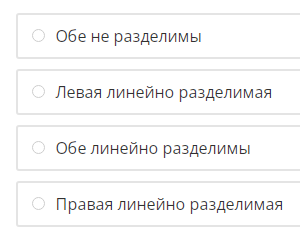

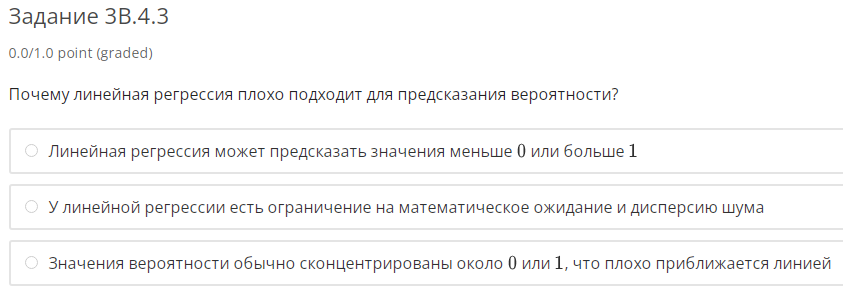

# 3B.5. Логистическая регрессия. Часть 2
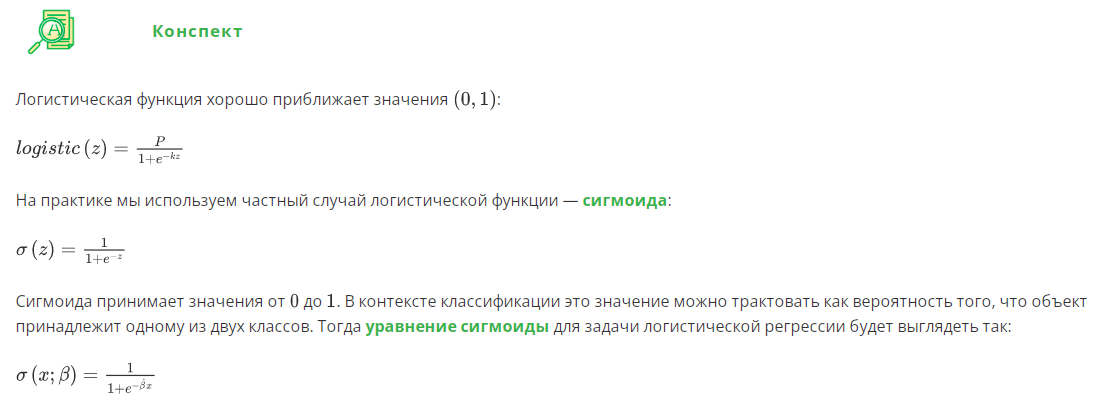
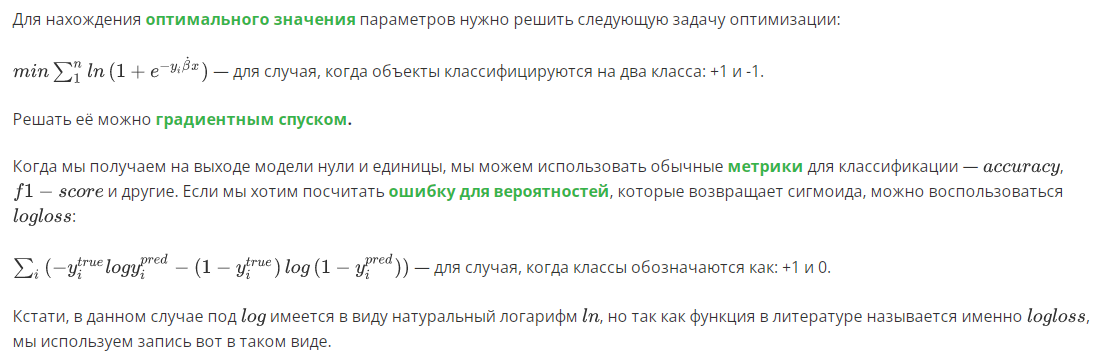
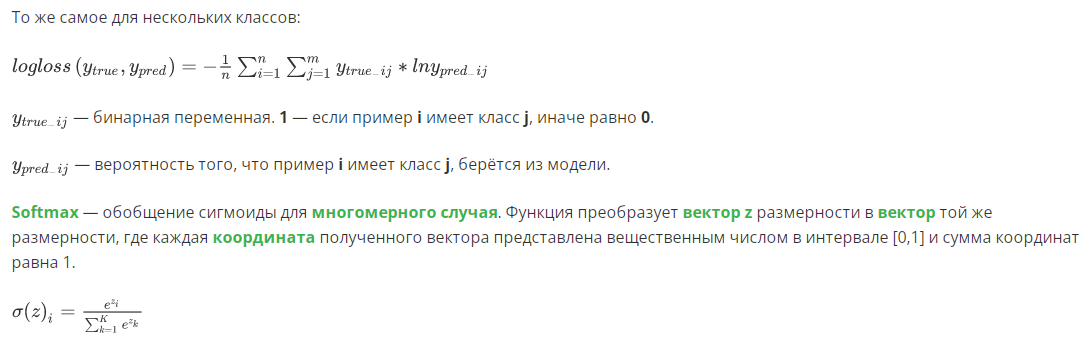

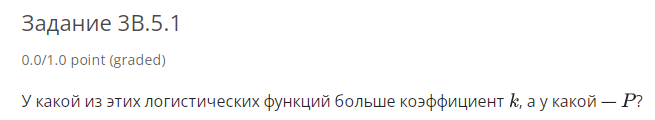
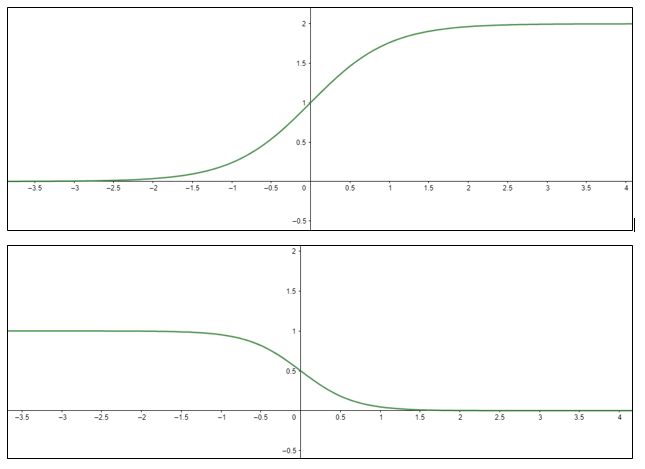
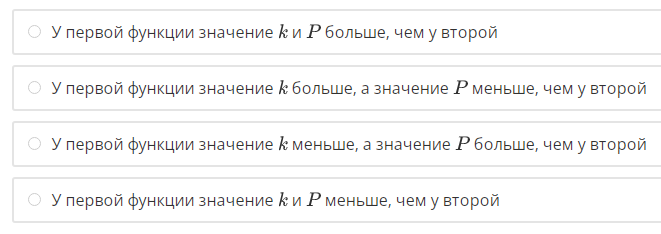

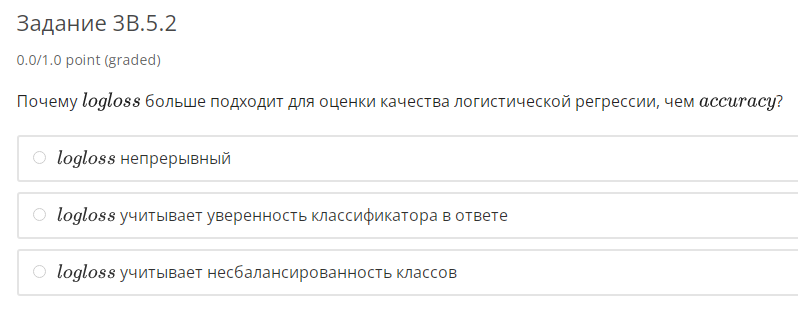

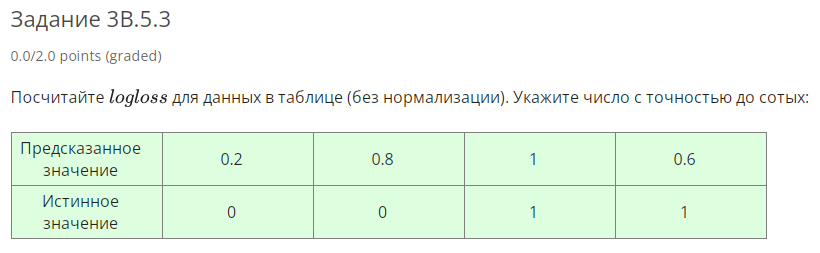

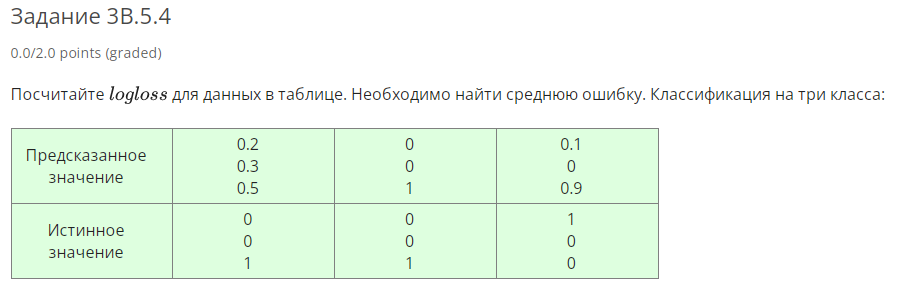

# 3B.6. Логистическая регрессия. Практика
Ноутбук к скринкасту можно скачать здесь.(https://lms.skillfactory.ru/assets/courseware/v1/9f27374a81b61dae07316888b4575569/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/SF_LR3__1_.ipynb)

In [5]:
# Реализуем логистическую регрессию. Начнём с импорта библиотеки:

import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

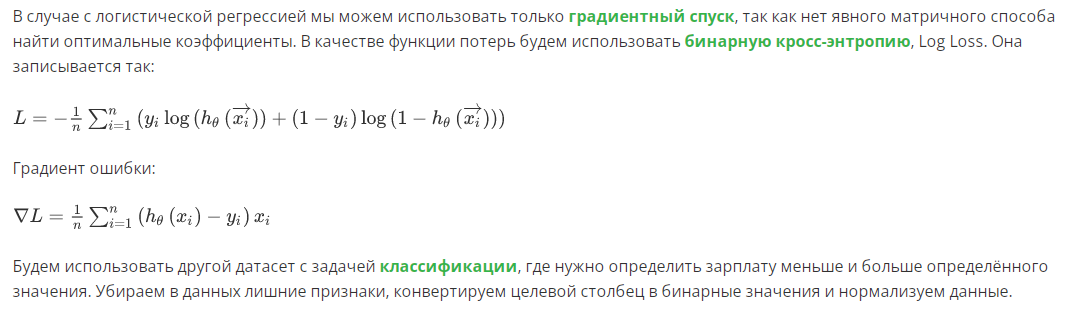

In [6]:
# Реализуем функцию sigmoid и функцию, вычисляющую градиент бинарной кросс-энтропии:

def sigmoid(X, theta):
    return 1. / (1. + np.exp(-X.dot(theta)))

def calc_binary_cross_entropy_grad(X, y, theta):
    n = X.shape[0]
    grad = 1. / n * X.transpose().dot(sigmoid(X, theta) - y)
    
    return grad

def gradient_step(theta, theta_grad, alpha):
    return theta - alpha * theta_grad
def optimize(X, y, grad_func, start_theta, alpha, n_iters):
    theta = start_theta.copy()
    
    for i in range(n_iters):
        theta_grad = grad_func(X, y, theta)
        theta = gradient_step(theta, theta_grad, alpha)
    
    return theta

# Сделаем предсказания на тренировочной выборке и посчитаем значение метрики  и  :

y_pred = sigmoid(X, theta) > 0.5
print_logisitc_metrics(y, y_pred)

# Мы уже знаем, что этой выборке нельзя доверять, поэтому разбиваем данные и оптимизируем:

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
theta = optimize(X_train, y_train, calc_binary_cross_entropy_grad, np.ones(m), 1., 300)
y_pred = sigmoid(X_valid, theta) > 0.5

print_logisitc_metrics(y_valid, y_pred)

# Результат практически тот же. Отрисуем ROC-кривую, посчитаем её значения и значение площади под кривой AUC.

# Для борьбы с переобучением добавим регуляризацию. Обернём линейную регрессию в класс:

class RegOptimizer():
    def __init__(self, alpha, n_iters):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters
    
    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad
    
    def grad_func(self, X, y, theta):
        raise NotImplementedError()

    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()

        for _ in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)

        return theta
    
    def fit(self, X, y):
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)
        
    def predict(self, X):
        raise NotImplementedError()
        
# Проделаем ту же операцию с логистичекой регрессией:

class LogReg(RegOptimizer):
    def sigmoid(self, X, theta):
        return 1. / (1. + np.exp(-X.dot(theta)))
    
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, theta) - y)

        return grad
    
    def predict_proba(self, X):
        return self.sigmoid(X, self.theta)
    
    def predict(self, X):
        if self.theta is None:
            raise Exception('You should train the model first')
        
        y_pred = self.predict_proba(X) > 0.5
        
        return y_pred

NameError: name 'theta' is not defined

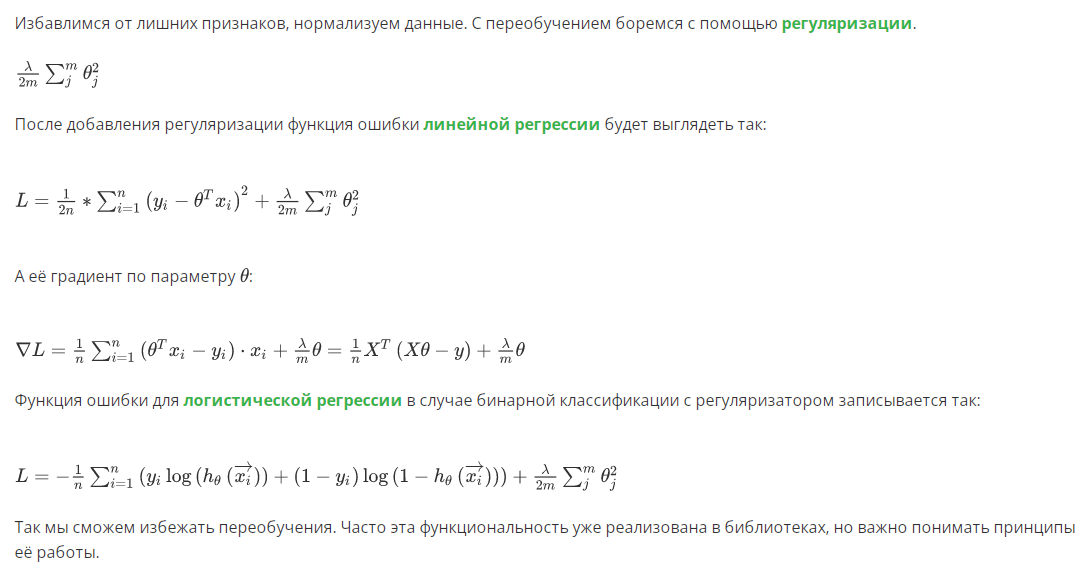

В качестве экспериментальных данных возьмем датасет о доходах граждан в различных странах Adult Income (https://lms.skillfactory.ru/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block@adult.data) (файл также можно скачать из открытого источника(https://archive.ics.uci.edu/ml/datasets/Adult)). Далее сделаем необходимую предобработку:


In [7]:
adult = pd.read_csv('./data/adult.data',
                    names=['age', 'workclass', 'fnlwgt', 'education',
                           'education-num', 'marital-status', 'occupation',
                           'relationship', 'race', 'sex', 'capital-gain',
                           'capital-loss', 'hours-per-week', 'native-country', 'salary'])

FileNotFoundError: [Errno 2] No such file or directory: './data/adult.data'

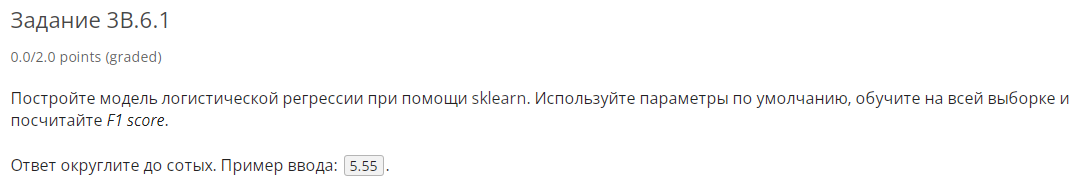

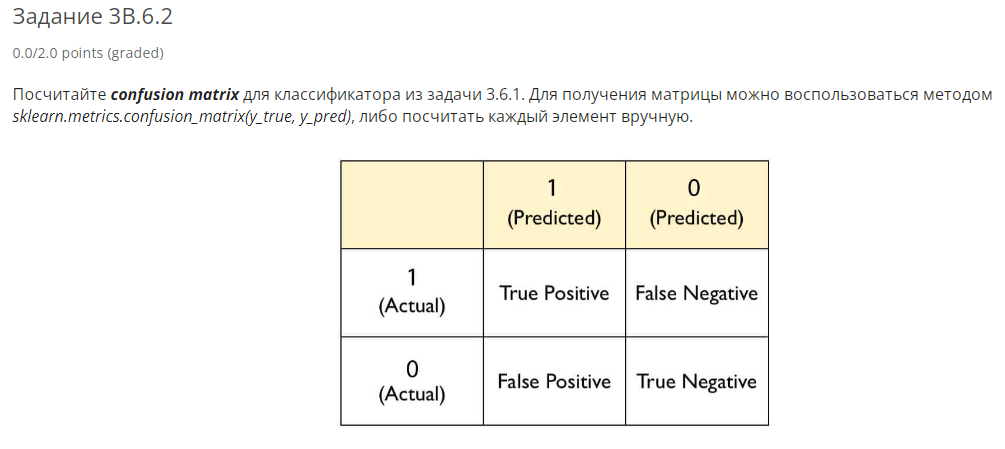
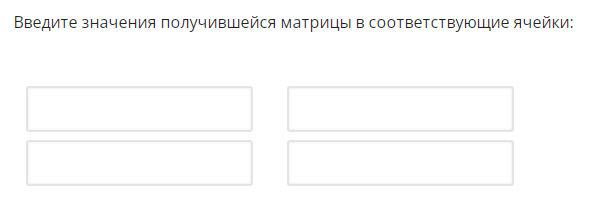

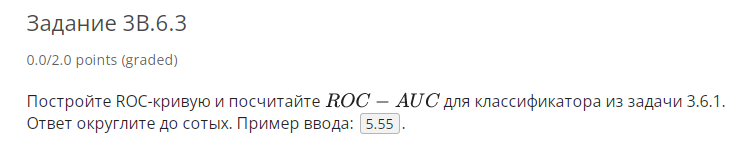

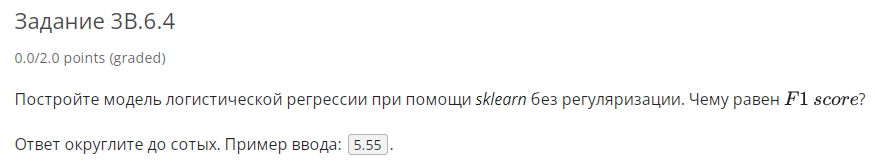

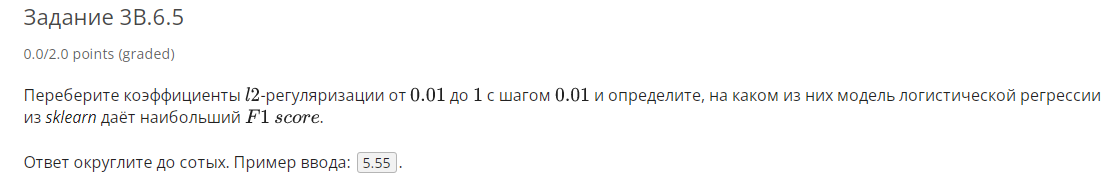

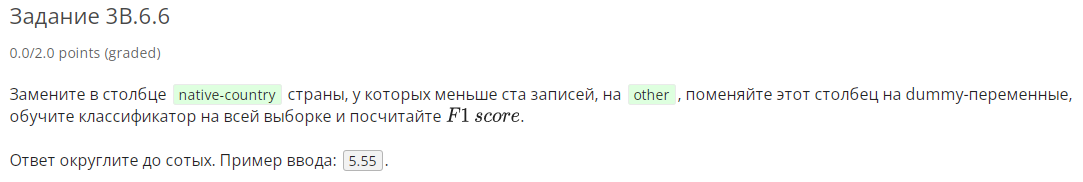

# 3B.7. Готовимся к собеседованию
Повторим пройденный материал немного необычным способом — ответив на вопросы о задачах классификации и регрессии, которые часто задают на собеседовании.

Ниже вы найдете несколько не очень сложных заданий. На одни вы ответите без труда, а для ответа на другие вам, возможно, придётся поискать дополнительную информацию.

После заданий мы дадим вам список из ключевых вопросов, которые чаще всего задают на интервью кандидатам — конечно, вместе с ответами.

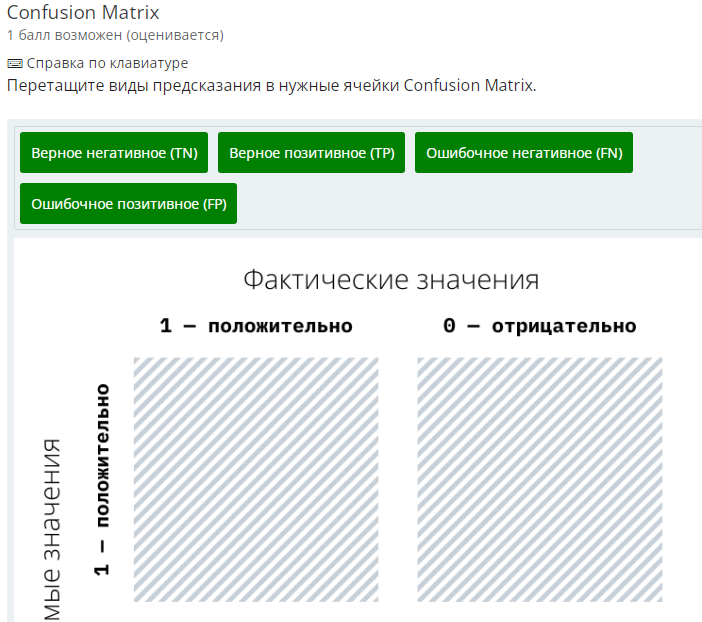
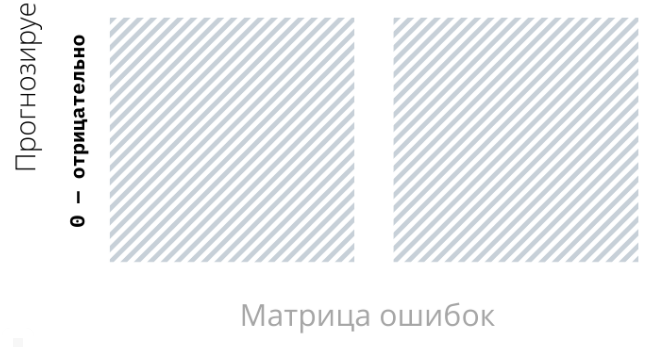

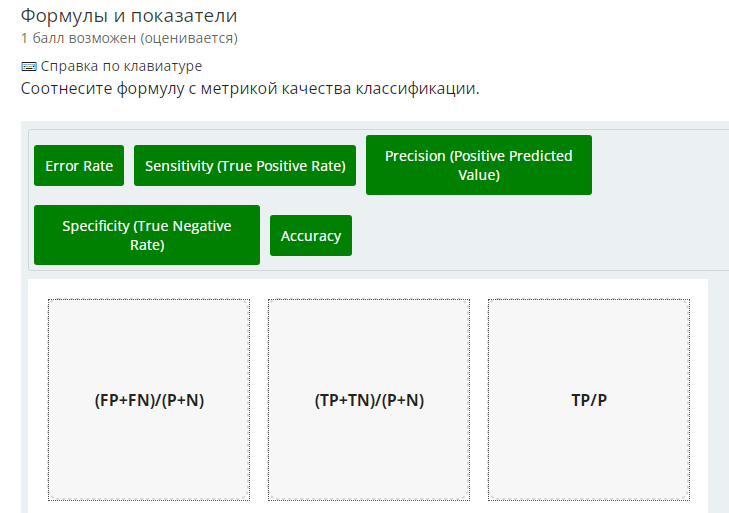
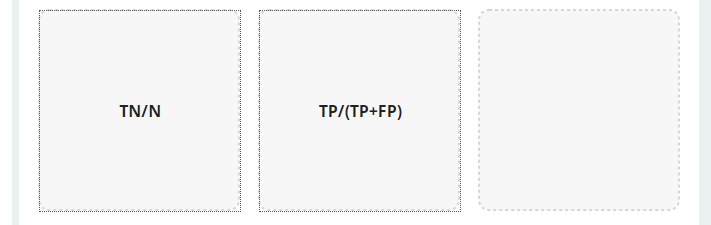

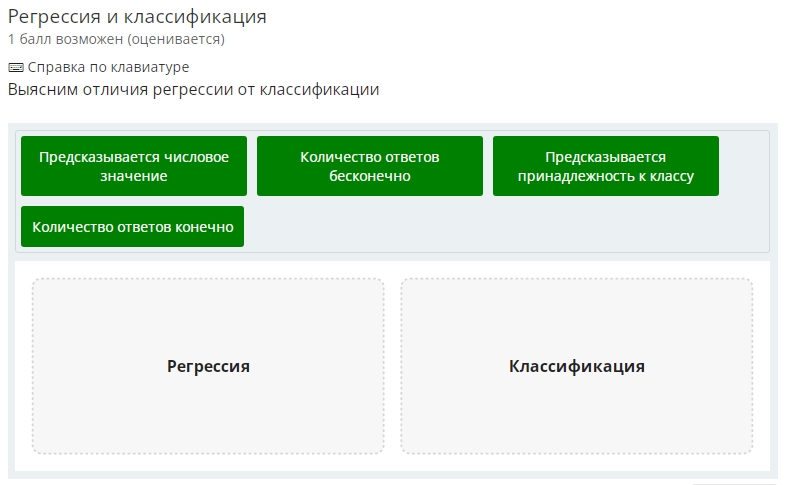

# Список часто задаваемых на собеседованиях вопросов
1. Что такое Confusion Matrix?

Это матрица 2x2, которая содержит четыре возможных исхода для бинарной классификации. На ее основе можно рассчитать различные метрики для оценки качества классификации:
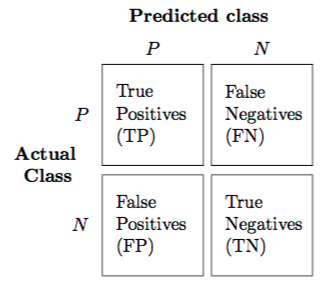
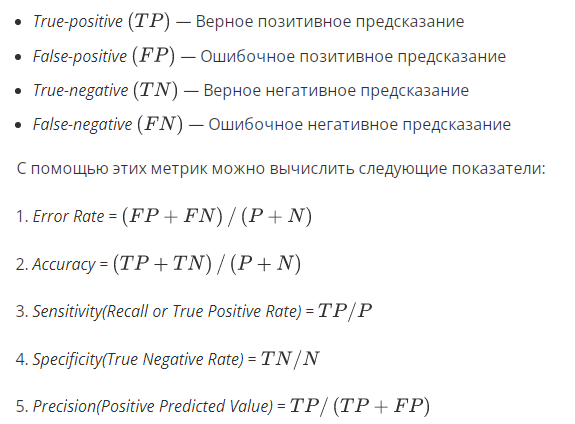
2. Приведите примеры, когда намного опаснее ошибочные позитивные классификации, чем ошибочные негативные.

Например, если наша задача классификации заключается в том, чтобы выявлять преступников.

3. Приведите примеры, когда намного опаснее ошибочные негативные классификации, чем ошибочные позитивные?

Например, если вы классифицируете больных раком и здоровых. Можете придумать собственные примеры.

4. Приведите примеры алгоритмов классификации

На данной диаграмме обозначены все основные алгоритмы:
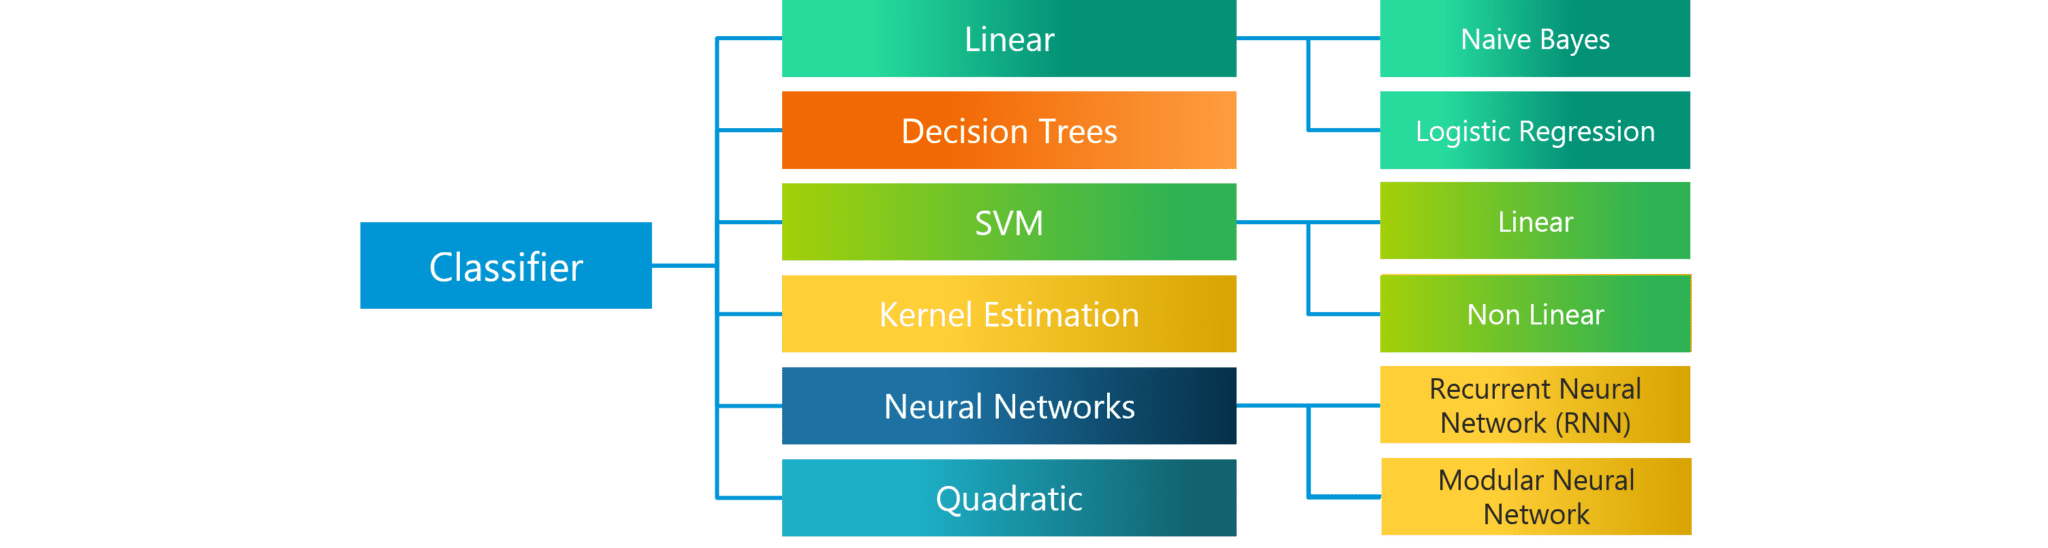
5. В чем отличие задачи регрессии и задачи классификации?

При решении задачи регрессии мы предсказываем для каждого объекта некоторое числовое значение, причем количество возможных ответов бесконечно. А при классификации мы предсказываем принадлежность к классу, и количество ответов конечно.